## Question 1 : Linear Regression
To check whether you are able to build simple linear regression model from scratch or not.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
 
!wget --no-check-certificate https://github.com/adigup390/datasets/raw/main/X.npy -O X.npy
!wget --no-check-certificate https://github.com/adigup390/datasets/raw/main/y.npy -O y.npy

--2021-05-27 11:41:27--  https://github.com/adigup390/datasets/raw/main/X.npy
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/adigup390/datasets/main/X.npy [following]
--2021-05-27 11:41:27--  https://raw.githubusercontent.com/adigup390/datasets/main/X.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 528 [application/octet-stream]
Saving to: ‘X.npy’

X.npy               100%[===================>]     528  --.-KB/s    in 0s      

2021-05-27 11:41:27 (12.6 MB/s) - ‘X.npy’ saved [528/528]

--2021-05-27 11:41:28--  https://github.com/adigup390/datasets/raw/main/y.npy
Resolving github.com (github

In [10]:
def load_data_LR():
  # Implement this function to read the dataset using the path declared in path_X and path_y
  # should return the X and y data
  # use np.load() to load the data google it you will get to know how to do it

  path_X = "X.npy"
  path_y = "y.npy"

  # Write your code here ----------
  X=np.load(path_X)
  y=np.load(path_y)

  # -------------------------------

  return X, y

In [11]:
def get_linear_model(X, y):
  # This shoudl return a proper linear model without bias of type y = XW

  # Write your code here ----------
  
  # -------------------------------
  
  #W = np.random.randn(D, out_shape)
  y_mean=np.mean(y)
  X_mean=np.mean(X)
  
  W=np.sum((X-X_mean)*(y-y_mean))/sum((X-X_mean)**2)

  return W

In [12]:
def MSE(y, y_pred):
  # should return the mean square error between the actual y and predicted y

  # Write your code here ----------
  
  # -------------------------------
  error=np.mean((y-y_pred)**2)

  return error

In [13]:
def train_by_algebra(X, y):
  # should return the trained weight 'W' using the linear algebra method i.e. setting dE/dW = 0

  # Write your code here ----------
  
  # -------------------------------
  W=get_linear_model(X,y)

  return W

In [21]:
def train_by_GD(X, y, epochs=5, lr=0.01):
  # should return the trained weight 'W' using the gradient descent for number of iterations equals to epochs
  # should also return error history int the cariable error_hist.shape = (epochs,); error_hist[i] = mean square error after epoch i-1
  # should also print mean square error after each epoch/ iteration
  # lr = "learning rate" i.e. eta
  
  # Write your code here ----------
  
  # -------------------------------
 m=0
 error_hist=np.zeros(epochs)
 for i in range(epochs):
    y_pred=m*X
    dm=-2*(np.mean(((y-y_pred)**2)*X))
    m=m-lr*dm
    error_hist[i]=MSE(y, y_pred)



  
 W=m

 return W, error_hist

### Now write a complete code using the function defined above to learn the model for following cases:

##### Learn **W** using linear algebra method and prints mean square error between actual y and predicted y. Use `y_pred = XW`. Also plot y_pred and y on different plots.

5.513263161917561


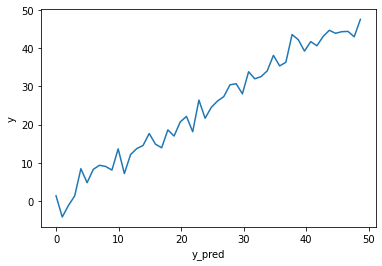

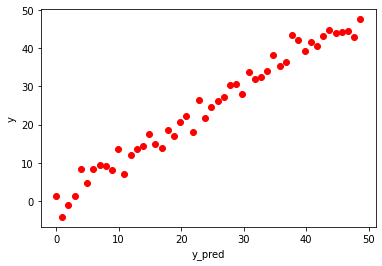

In [15]:
# Write your code here ----------
X,y=load_data_LR()
W=train_by_algebra(X,y)
y_pred=W*X
mse=MSE(y,y_pred)
print(mse)

plt.plot(y_pred,y)
plt.xlabel("y_pred")
plt.ylabel("y")
plt.show()
plt.scatter(y_pred,y,color="red")
plt.xlabel("y_pred")
plt.ylabel("y")
plt.show()

  
# -------------------------------

##### Learn **W** using gradient descent method for following learning rates, `lr = [0.01, 0.001, 0.0001]` for **10 epochs**. Plot **MSE vs epochs** for each of them.  Also plot y_pred and y on different plots.

For learning rate 0.0100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in square
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]


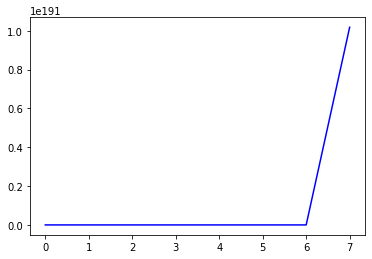

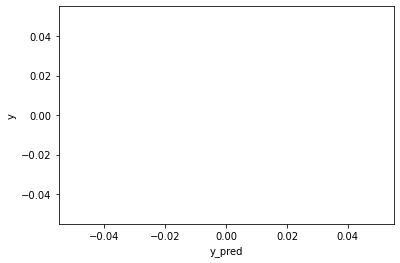

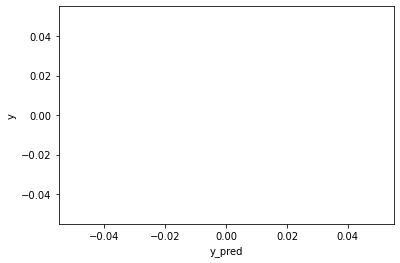

For learning rate 0.0010


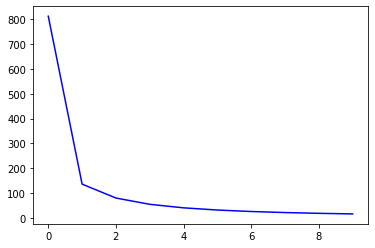

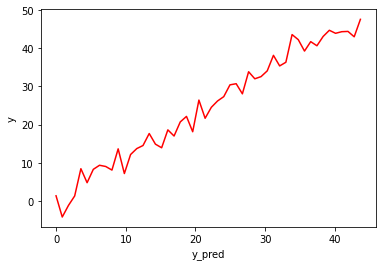

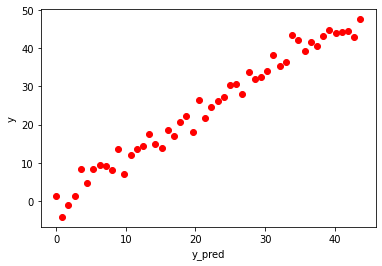

For learning rate 0.0001


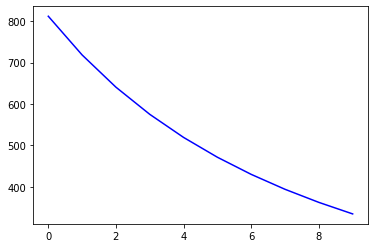

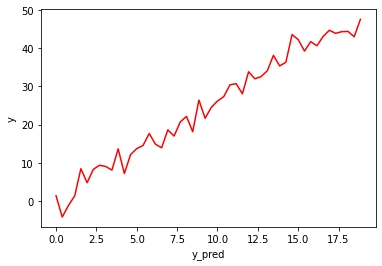

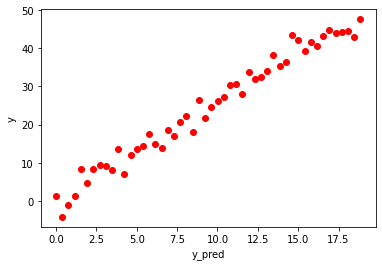

In [37]:
# Write your code here ----------
  
# -------------------------------
lr=[0.01,0.001,0.0001]
for i in lr:
  W , error_hist=train_by_GD(X, y, 10, i)
  y_pred=X*W
  error=MSE(y,y_pred)
  print("For learning rate %.4f"% i);
  plt.plot(error_hist,color='blue')
  plt.show()
  plt.plot(y_pred,y,color='red')
  plt.xlabel("y_pred")
  plt.ylabel("y")
  plt.show()
  plt.scatter(y_pred,y,color='red')
  plt.xlabel("y_pred")
  plt.ylabel('y')
  plt.show()
  
  

 




## Question 2: Image Classification in Tensorflow using Deep Learning
To check whether you are able to build a given neural network model in tensorflow or not. First we will build a fully connected NN model second we will build a CNN model.

In [1]:

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
def plot_history(history):
  # function to plot accuracy vs epoch

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

In [3]:
def load_data_cifar10_norm():
  # should return the normalised cifar10 dataset by loading it from tensorflow
  # link: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/

  # Write your code here ----------

  # -------------------------------
  (x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()
  x_train=tf.keras.utils.normalize(x_train)
  x_test=tf.keras.utils.normalize(x_test)
  y_train=tf.keras.utils.normalize(y_train)
  y_test=tf.keras.utils.normalize(y_test)
  
  

  return x_train, y_train, x_test, y_test

### Define a fully connected neural network model with following attributes:

*   Total number of **hidden layers = 4**, all with **relu** activation
*   Number of neurons in **first hidden layer = 7200**
*   Number of neurons in **second hidden layer = 2304**
*   Number of neurons in **third hidden layer = 1024**
*   Number of neurons in **fourth hidden layer = 64**


In [4]:
def build_fc_model(input_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model

  # Write your code here ----------

  # -------------------------------

  model=tf.keras.models.Sequential()
  model.add(tf.keras.layers.Input(shape=input_shape))
  model.add(tf.keras.layers.Dense(7200,activation=tf.nn.relu))
  model.add(tf.keras.layers.Dense(2304,activation=tf.nn.relu))
  model.add(tf.keras.layers.Dense(1024,activation=tf.nn.relu))
  model.add(tf.keras.layers.Dense(64,activation=tf.nn.relu))
  model.add(tf.keras.layers.Dense(num_class,activation=tf.nn.softmax))


  return model

### Define a CNN model with following attribute:

*   Total number of **hidden layer = 4**
*   After every convolutional layer there must be a MaxPoolingLayer of size (2, 2)
*   Total number of convolutional layer = 3, all with **relu** activation.
    *    Number of filters in **first convolutional layer = 32**
    *    Number of filters in **second convolutional layer = 64**
    *    Number of filters in **third convolutional layer = 64**
*   After all convolutional layer flatten the output and use **dense layer of 64 neurons**



In [5]:
def build_cnn_model(input_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model

  # Write your code here ----------

  # -------------------------------
  model=tf.keras.models.Sequential()
  model.add(tf.keras.Input(shape=input_shape))
  model.add(tf.keras.layers.Conv2D(32,(3,3),activation=tf.nn.relu))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
  
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(64,activation=tf.nn.relu))
  model.add(tf.keras.layers.Dense(num_class,activation=tf.nn.softmax))
  
  return model

### Compile and train the fully connected neural network model using the above functions.

In [ ]:
# Write your code here ----------

# -------------------------------
x_train, y_train, x_test, y_test=load_data_cifar10_norm()
model=build_fc_model()
model.compile(loss='sparse_categorical_crossentropy',optimizer="rmsprop",metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=10, batch_size=512,validation_data=(x_test, y_test))

plot_history(history)
model.summary()


Epoch 1/10


### Compile and train the CNN model using the above functions.

In [8]:
# Write your code here ----------

# -------------------------------

x_train,y_train,x_test,y_test = load_data_cifar10_norm()

model=build_cnn_model()
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=10, batch_size=512,validation_data=(x_test, y_test))

plot_history(history)
model.summary()



Exception: ignored

### What do you observe? Compare both the model by looking at their Accuracy vs Epoch plot and total numbers of trainable parameters.

In [17]:
print("Replace this with your observation")




Replace this with your observation


NameError: ignored